<h1 align= center>Machine Faliure Project</h1>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

<h2 align = center> Step 1</h2>

### Read The Dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv('train.csv')

In [4]:
df.shape

(136429, 14)

In [5]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [6]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

* Imported the Pandas Library and checking the basic information of the dataset like shape, column, info etc.

<h2 align = center> Step 2</h2>

### Check The Missing Values in Dataframe

In [8]:
df.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

* Data set Has No missing values 

In [9]:
df.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

In [10]:
df.nunique().sort_values(ascending=False)

id                         136429
Product ID                   9976
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Air temperature [K]            95
Process temperature [K]        81
Type                            3
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

<h2 align = center> Step 3</h2>

### Seperate X and Y

In [11]:
X = df.drop(labels=['id', 'Product ID', 'Machine failure'],axis=1)

Y = df[['Machine failure']]

In [12]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [13]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


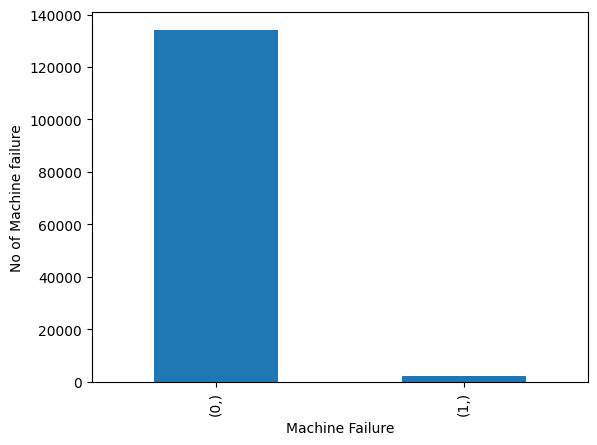

In [18]:
Y.value_counts().plot(kind='bar')
plt.xlabel('Machine Failure')
plt.ylabel('No of Machine failure')
plt.show()

Dropping the the columns who have no affect on model Perfomance from dataset.     
And sepertaing the dependent and Independent Variable

<h2 align = center> Step 4</h2>

### Categorical (Cat), Contiious (Con) Seperation.

In [19]:
cat = list(X.columns[X.dtypes == 'object'])
con = list(X.columns[X.dtypes != 'object'])

In [20]:
cat

['Type']

In [21]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

* saperate The Categorical and Continous Values

<h2 align = center> Step 5</h2>

### Create A Sklearn Pipeline for Feature Seleaction.

In [22]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [23]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('rdinal',OrdinalEncoder())])

pre = ColumnTransformer([('num',num_pipe,con),
                        ('cat',cat_pipe,cat)])

In [24]:
X_pre = pre.fit_transform(X)

In [25]:
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [26]:
cols = pre.get_feature_names_out()

In [27]:
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [28]:
X_pre = pd.DataFrame(X_pre, columns=cols)

In [29]:
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


<h2 align = center> Step 6</h2>

### Cheacking the Mutual Info Scores

In [30]:
from sklearn.feature_selection import mutual_info_classif
imp = mutual_info_classif(X_pre,Y)

In [31]:
imp 

array([0.00572846, 0.00232993, 0.01912488, 0.01946418, 0.00722889,
       0.00752637, 0.02431427, 0.01124344, 0.01928561, 0.00187629,
       0.01149949])

In [32]:
imp = pd.Series(imp)
imp.index = X_pre.columns

In [33]:
imp

num__Air temperature [K]        0.005728
num__Process temperature [K]    0.002330
num__Rotational speed [rpm]     0.019125
num__Torque [Nm]                0.019464
num__Tool wear [min]            0.007229
num__TWF                        0.007526
num__HDF                        0.024314
num__PWF                        0.011243
num__OSF                        0.019286
num__RNF                        0.001876
cat__Type                       0.011499
dtype: float64

In [35]:
imp = imp.sort_values(ascending=False)

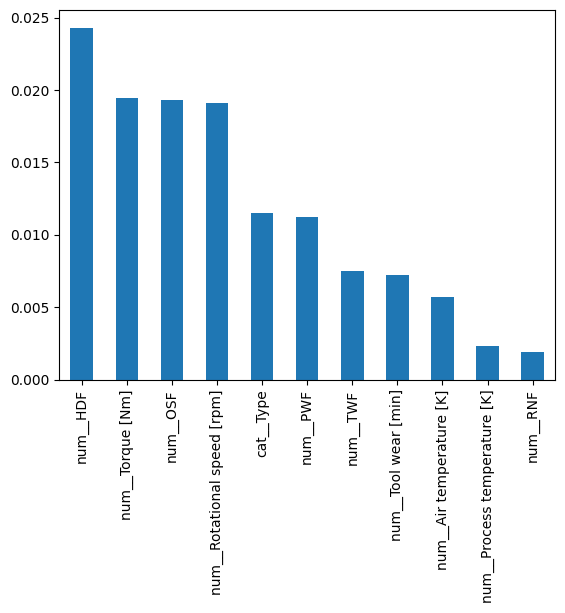

In [37]:
imp.plot(kind='bar')
plt.show()

* Using All the Columns beacause to Determaine the Machine Faliure we need to have every Parameter of a Machine

* Skiping the Created Selected Columns Dataframe steps

<h2 align = center> Step 7</h2>

### Build The Final Sklearn Pipeline.

In [38]:
cat

['Type']

In [39]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
num_pipe1 = Pipeline(steps=[('imuter',SimpleImputer(strategy='median')),
                            ('scalar',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('Ohe',OneHotEncoder(handle_unknown='ignore'))])

pre1 = ColumnTransformer([('num',num_pipe2,con),
                        ('cat',cat_pipe2,cat)])

In [44]:
X_pre1 = pre1.fit_transform(X)

In [45]:
X_pre1

array([[ 0.3958803 , -0.24623038,  0.54541592, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30220363, -1.04035788,  2.05187289, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59097397, -1.32913151,  0.26430672, ...,  0.        ,
         1.        ,  0.        ]])

In [46]:
cols1 = pre1.get_feature_names_out()

In [47]:
cols1

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [48]:
X_pre1 = pd.DataFrame(X_pre1,columns=cols1)

In [50]:
X_pre1.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


<h2 align = center> Step 8</h2>

### Perfoming The Train Test Split.

In [52]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre1,Y, test_size=0.2,random_state=42)

In [53]:
xtrain.shape

(109143, 13)

In [54]:
xtest.shape

(27286, 13)

In [55]:
ytrain.shape

(109143, 1)

In [56]:
ytest.shape

(27286, 1)

<h2 align = center> Step 9</h2>

### Evaluauating the Algorithms. 

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [62]:
dct = {'LogisticRegression':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'GradientBoost':GradientBoostingClassifier(),
    'KNN':KNeighborsClassifier(),
    'SVM' :SVC()
    
}

In [63]:
dct.items()

dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoost', GradientBoostingClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())])

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

tr = []
ts = []
tr_cv = []

for name, model in dct.items():
    # Fit the model on training data
    model.fit(xtrain,ytrain)
    
    # Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    
    # Calculate F1 scores Training And Testing
    tr_f1 = f1_score(ytrain,ypred_tr)
    ts_f1 = f1_score(ytest,ypred_ts)
    
    # Calculate F1 Cross validated results
    cv_f1 = cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1')
    cv_avg = cv_f1.mean()
    
    # Append all values in list
    tr.append(tr_f1)
    ts.append(ts_f1)
    tr_cv.append(cv_avg)
    
    # Print the results
    print(f"Model Name : {name}\n")
    print(f"Traning F1 : {tr_f1:.4f}")
    print(f"Testing F1 : {ts_f1:.4f}")
    print(f'Traning CV : {cv_avg:.4f}')
    print('\n================================================================================\n')

Model Name : LogisticRegression

Traning F1 : 0.8625
Testing F1 : 0.8649
Traning CV : 0.8622


Model Name : DecisionTree

Traning F1 : 0.9950
Testing F1 : 0.7649
Traning CV : 0.7409


Model Name : RandomForest

Traning F1 : 0.9947
Testing F1 : 0.8612
Traning CV : 0.8569


Model Name : GradientBoost

Traning F1 : 0.8732
Testing F1 : 0.8637
Traning CV : 0.8577


Model Name : KNN

Traning F1 : 0.8629
Testing F1 : 0.8619
Traning CV : 0.8597


Model Name : SVM

Traning F1 : 0.8628
Testing F1 : 0.8649
Traning CV : 0.8621




### Create a Dataframe for Model Evaluation

In [65]:
dct_eval = {'Model Name' : list(dct.keys()),
            'TrainF1' : tr,
            'TrainF1CV' : tr_cv,
            'TestF1' : ts 
}

In [68]:
df_eval = pd.DataFrame(dct_eval)
df_eval.sort_values(by='TestF1',ascending=False)

,Model Name,TrainF1,TrainF1CV,TestF1
0,LogisticRegression,0.862525,0.862230,0.864865
5,SVM,0.862810,0.862128,0.864865
3,GradientBoost,0.873239,0.857656,0.863694
4,KNN,0.862887,0.859661,0.861935
2,RandomForest,0.994721,0.856945,0.861183
1,DecisionTree,0.995007,0.740939,0.764904


#### Selecting Logistic Regression As our Final Model

#### Perfom  Hyperparameter Tuning 

In [76]:
params = {'C': [ 0.001, 0.01, 0.1, 1, 10, 50, 100, 1000] }

In [77]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr, param_distributions=params, cv=5, scoring='f1', random_state=21)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,
                                              1000]},
                   random_state=21, scoring='f1')

In [78]:
rscv.best_params_

{'C': 0.1}

In [79]:
rscv.best_score_

0.862513786746223

In [80]:
best_lr = rscv.best_estimator_

In [81]:
best_lr

LogisticRegression(C=0.1)

#### Evaluating Best Model

In [82]:
best_lr.score(xtrain,ytrain)

0.9961976489559569

In [83]:
best_lr.score(xtest,ytest)

0.9961518727552591

### Predicting Train and Test Data

In [87]:
ypred_tr = best_lr.predict(xtrain)

In [85]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [86]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [88]:
ypred_ts = best_lr.predict(xtest)

In [89]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [90]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


### Plotting the Confusion Metrix

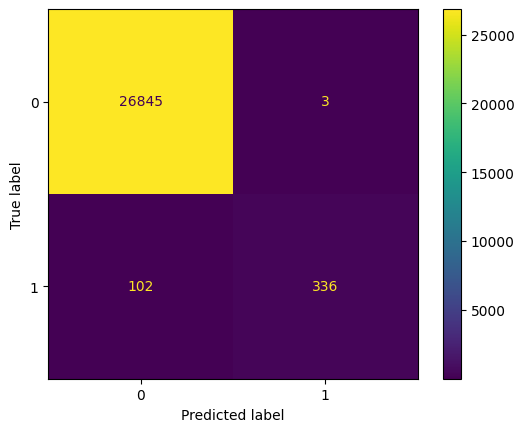

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_lr.classes_)
cfd.plot()
plt.show()

### Printing The Classification Report

In [93]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



<h2 align = center> Step 10</h2>

### Plotting the AUC and ROC Curve. 


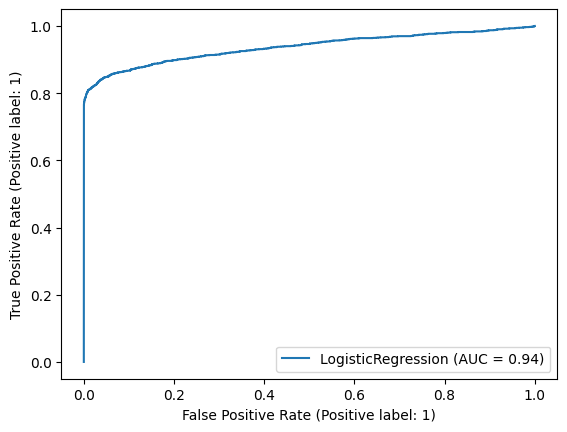

In [95]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr,xtrain,ytrain)
plt.show()

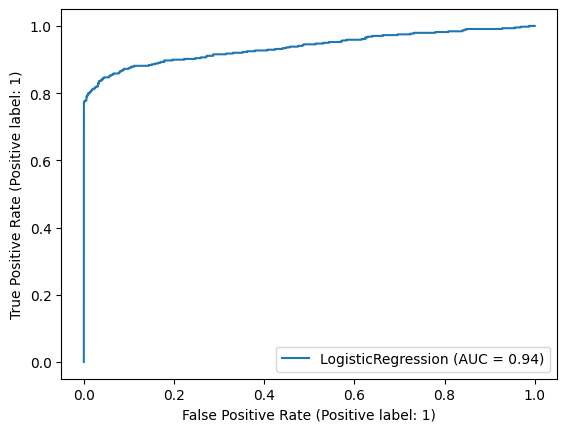

In [96]:
RocCurveDisplay.from_estimator(best_lr,xtest,ytest)
plt.show()

<h2 align = center> Step 11</h2>

# Predicting the file test.csv 

In [97]:
df2 = pd.read_csv('test.csv')

In [98]:
df2.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [100]:
xnew = pre1.transform(df2)
xnew

array([[ 1.30875929,  1.12544438, -0.15375311, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.76447734,  1.3887435 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77177165,  0.33131689,  0.03365302, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-2.2890579 , -2.70080627, -0.13933725, ...,  0.        ,
         1.        ,  0.        ],
       [-0.9465888 , -1.54571174,  0.09852438, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.95314446,  2.06395869,  0.09852438, ...,  0.        ,
         1.        ,  0.        ]])

In [103]:
xnew_pre = pd.DataFrame(xnew,columns=cols1)

In [104]:
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [119]:
# Predict Values
pred = best_lr.predict(xnew_pre)
#prob = best_lr.predict_proba(xnew_pre)[:-1]

In [120]:
pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [121]:
prob[0:5]

array([[0.99777528, 0.00222472],
       [0.998901  , 0.001099  ],
       [0.99729104, 0.00270896],
       [0.99691212, 0.00308788],
       [0.99613754, 0.00386246]])

In [122]:
df_final = df2[['id']]
df_final.head()

,id
0,136429
1,136430
2,136431
3,136432
4,136433


In [123]:
df_final.head()

,id
0,136429
1,136430
2,136431
3,136432
4,136433


In [124]:
df_final['machine_failure']=pred

In [126]:
df_final.head()

,id,machine_failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0


In [127]:
df_final['machine_failure'].value_counts()

machine_failure
0    89849
1     1105
Name: count, dtype: int64

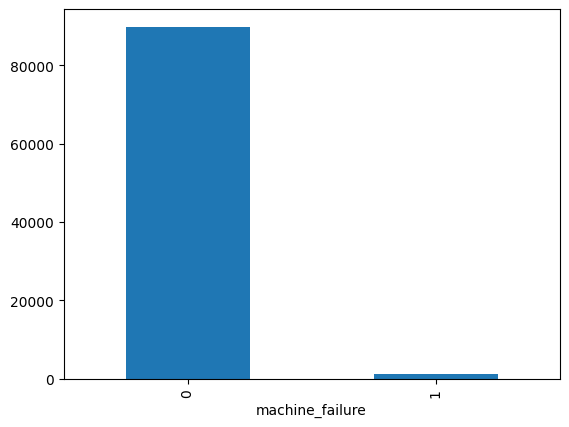

In [129]:
df_final['machine_failure'].value_counts().plot(kind='bar')
plt.show()

### Save Data to csv

In [130]:
df_final.to_csv('Machine_Failure_predictions.csv',index=False)